In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.metrics import silhouette_score,silhouette_samples

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer

import os 
os.chdir('D:/Downloads/Brainwaves/2')

In [2]:
news=pd.read_csv("news.csv")
print(news.shape)
news.head()

(3000, 3)


,id,headline,text
0,uid-1,Market Advances 5.12 More,NEW YORK (AP) - A prime rate reduction by New ...
1,uid-2,District Boosts Request For Anti-Terrorism Aid...,Mayor Anthony A. Williams petitioned the White...
2,uid-3,"Election? Here's How You Do It, Mate.",From our downunder perspective here in Austral...
3,uid-4,The Biggest Boom Ever,We are about to rewrite history. Unless a rece...
4,uid-5,Economic Aide Sees Uptrend,"Sedate and scholarly Dr. Arthur Burns, the ex-..."


In [3]:
sample=pd.read_csv("sampleCsv.csv")
print(sample.shape)
sample.head()

(3000, 2)


,id,cluster
0,uid-1,0
1,uid-2,0
2,uid-3,0
3,uid-4,0
4,uid-5,0


In [4]:
sample['cluster'].unique()

array([0, 1], dtype=int64)

In [5]:
X=TfidfVectorizer(stop_words='english',max_features=1).fit_transform(news['text'].values)
X=X.toarray()

X=np.hstack((X,np.zeros(X.shape[0],).reshape(-1,1)))
print(X.shape)

(3000, 2)


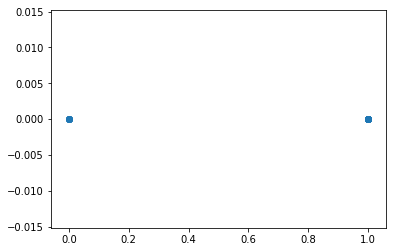

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
kmean=KMeans(n_clusters=2)
kmean.fit(X)

print(silhouette_score(X,kmean.predict(X)))

1.0
Wall time: 452 ms


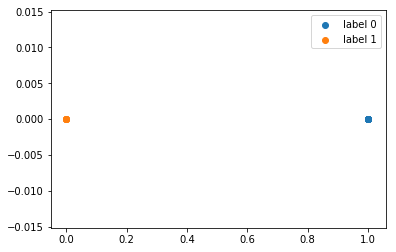

In [8]:
labels=kmean.predict(X)
plt.scatter(X[labels==0,0],X[labels==0,1],label='label 0')
plt.scatter(X[labels==1,0],X[labels==1,1],label='label 1')
plt.legend()
plt.show()

In [9]:
sample['cluster']=kmean.predict(X)
sample.head()

,id,cluster
0,uid-1,0
1,uid-2,0
2,uid-3,0
3,uid-4,0
4,uid-5,0


In [10]:
sample.to_csv("bw20192.csv",index=False)
np.savetxt("bw2array.txt",X)
print("done")

done


In [11]:
Y=np.loadtxt("bw20192array.txt")
l=pd.read_csv("Second-submission.csv")['cluster'].values
silhouette_score(Y,l)

1.0